In [1]:
import pandas as pd
import numpy as np
import json
import pickle
import matplotlib.pyplot as plt
import warnings
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')

In [2]:
from american_option import *

In [3]:
base_df = pd.read_json('json/results_stack.json', orient='index').rename(columns={'y_true':'S', 'y_pred':'S_pred'})
std_df = pd.read_json('json/daily_std.json', orient='index')
np.random.seed(0)

In [4]:
#Initialize option class
option = american_option(base_df, 24, 100000, std_df)

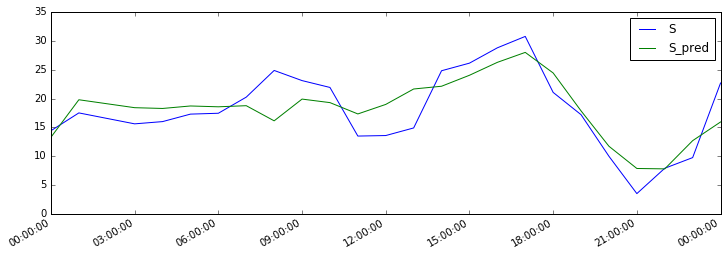

In [104]:
option.plot_real_predicted_values('2017-03-26 00:00:00')

In [105]:
df_mc = option.generate_random_paths('2017-03-26 00:00:00')

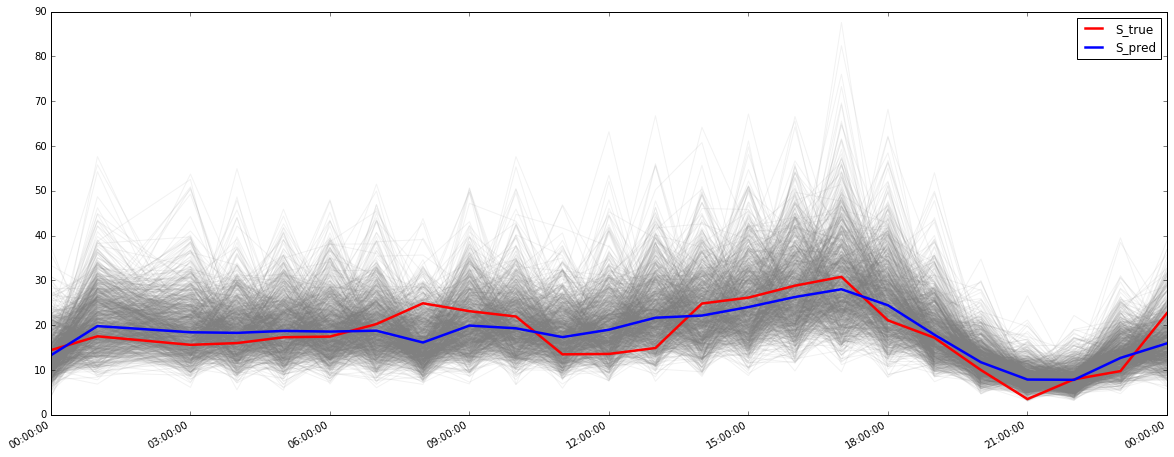

In [106]:
option.plot_montecarlo()

In [107]:
#Compute option value
option.compute_option_value(10, 3)

27.061697519624488

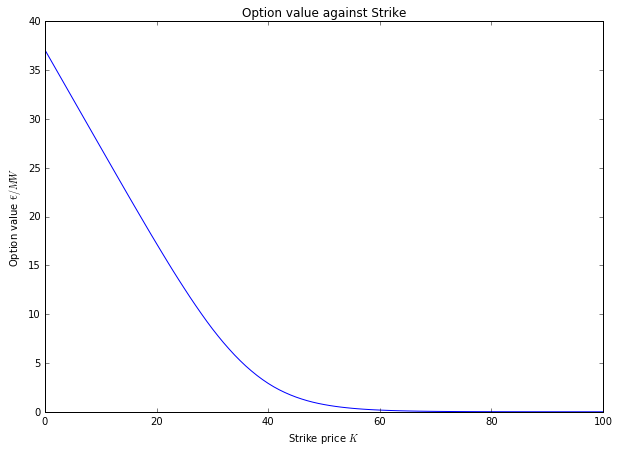

In [108]:
#Option value change against strike
K = np.linspace(0,100,101)
C_list = option.compute_option_value(K,3)
option.plot_option_value_vs_strike(K, C_list)